In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
data = pd.read_excel('cleaned_startup_data.xlsx')

In [230]:
data.head()

,company_name,year,city,state,sector,stage,funding,funding_round,no_of_investors,employee_count,funding_norm,employee_norm,investor_norm,stage_norm,success_score,success_label
0,reliance jio,2010,mumbai,maharashtra,73,5,2.476762e+10,1,2,300,1.000000,0.597586,0.083333,0.714286,0.730466,High
1,flipkart,2007,bengaluru,karnataka,910,5,9.009185e+09,1,2,300,0.363748,0.597586,0.083333,0.714286,0.475966,High
2,reliance retail,2006,mumbai,maharashtra,272,5,6.419310e+09,1,2,300,0.259182,0.597586,0.083333,0.714286,0.434139,High
3,one97,2000,noida,uttar pradesh,1142,5,4.432652e+09,1,2,300,0.178970,0.597586,0.083333,0.714286,0.402054,High
4,byju’s,2011,bengaluru,karnataka,925,5,2.745964e+09,1,2,300,0.110869,0.597586,0.083333,0.714286,0.374814,High


In [231]:
data.shape

(5232, 16)

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company_name     5232 non-null   object 
 1   year             5232 non-null   int64  
 2   city             5232 non-null   object 
 3   state            5232 non-null   object 
 4   sector           5232 non-null   int64  
 5   stage            5232 non-null   int64  
 6   funding          5232 non-null   float64
 7   funding_round    5232 non-null   int64  
 8   no_of_investors  5232 non-null   int64  
 9   employee_count   5232 non-null   int64  
 10  funding_norm     5232 non-null   float64
 11  employee_norm    5232 non-null   float64
 12  investor_norm    5232 non-null   float64
 13  stage_norm       5232 non-null   float64
 14  success_score    5232 non-null   float64
 15  success_label    5232 non-null   object 
dtypes: float64(6), int64(6), object(4)
memory usage: 654.1+ KB


In [233]:
data = data[data['year'] >= 1990]

In [234]:
data['funding_log'] = np.log1p(data['funding'])
data['employee_log'] = np.log1p(data['employee_count'])
data['investors_log'] = np.log1p(data['no_of_investors'])
data['funding_round_log'] = np.log1p(data['funding_round'])

In [235]:
print(data[['funding_log', 'employee_log', 'investors_log', 'funding_round_log']].skew())

funding_log         -0.340676
employee_log         1.072649
investors_log        0.990505
funding_round_log    2.211244
dtype: float64


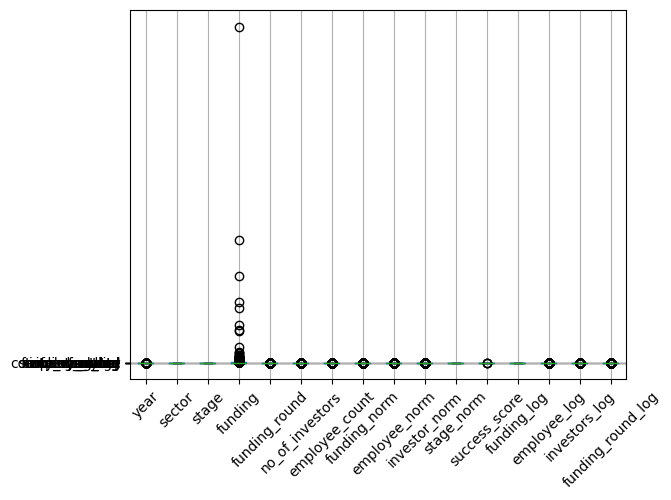

In [236]:
data.boxplot()
plt.xticks(rotation = 45)
plt.show()

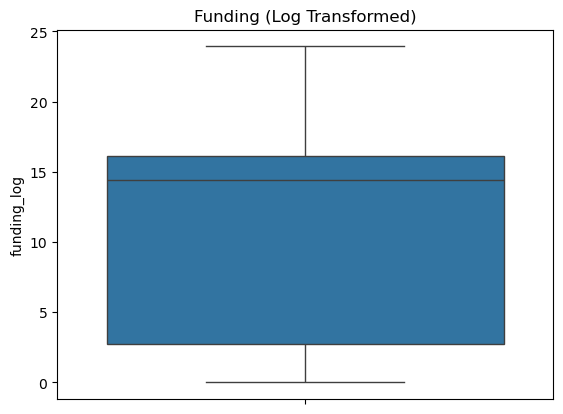

In [237]:
sns.boxplot(data['funding_log'])
plt.title('Funding (Log Transformed)')
plt.show()

In [238]:
data['city_encoded'] = data['city'].astype('category').cat.codes
data['state_encoded'] = data['state'].astype('category').cat.codes

In [239]:
data.drop(columns=['investor_norm'], inplace=True)
data.drop(columns=['funding_round_log'], inplace=True) 
data.drop(columns=['funding_norm'], inplace=True) 
data.drop(columns=['stage_norm'], inplace=True) 
data.drop(columns=['employee_norm'], inplace=True) 
data.drop(columns=['no_of_investors'], inplace=True)
data.drop(columns=['employee_count'], inplace=True)  

In [240]:
corr_matrix = data.select_dtypes(include='number').corr()

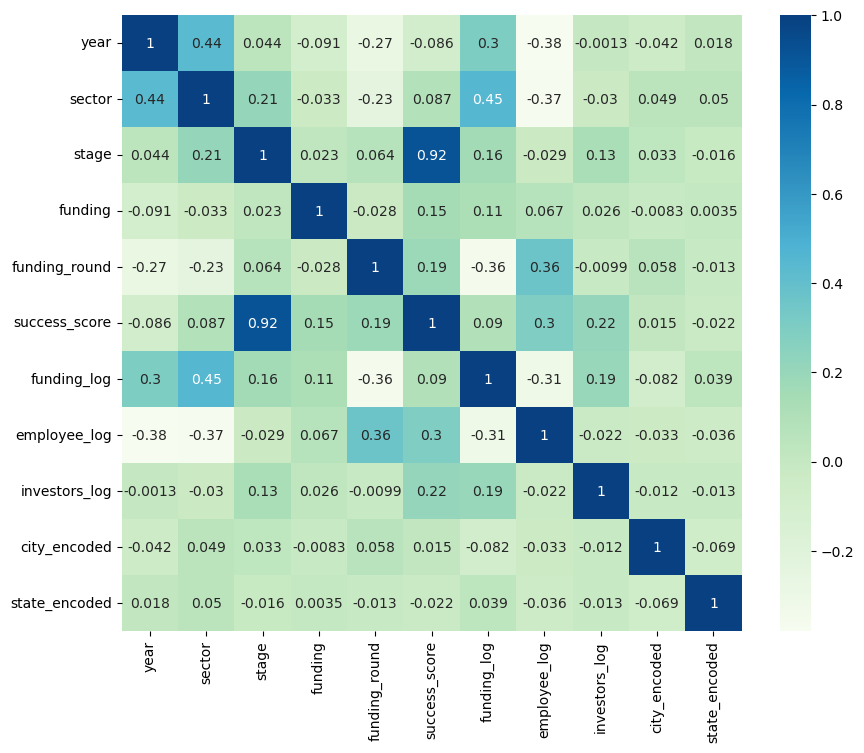

In [241]:
plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu')
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_32728\3532047111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stage', y='success_score', data=data, palette='coolwarm')


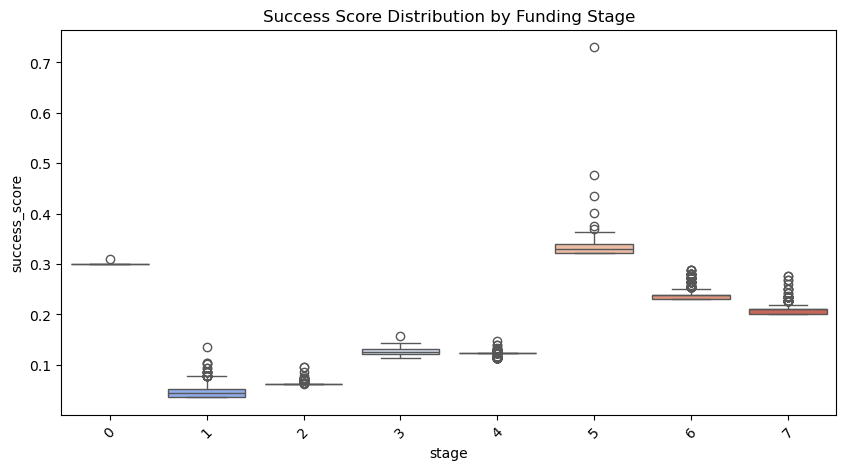

In [242]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stage', y='success_score', data=data, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Success Score Distribution by Funding Stage")
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_32728\4141283957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='success_score', data=data[data['city'].isin(top_cities)], palette='viridis')


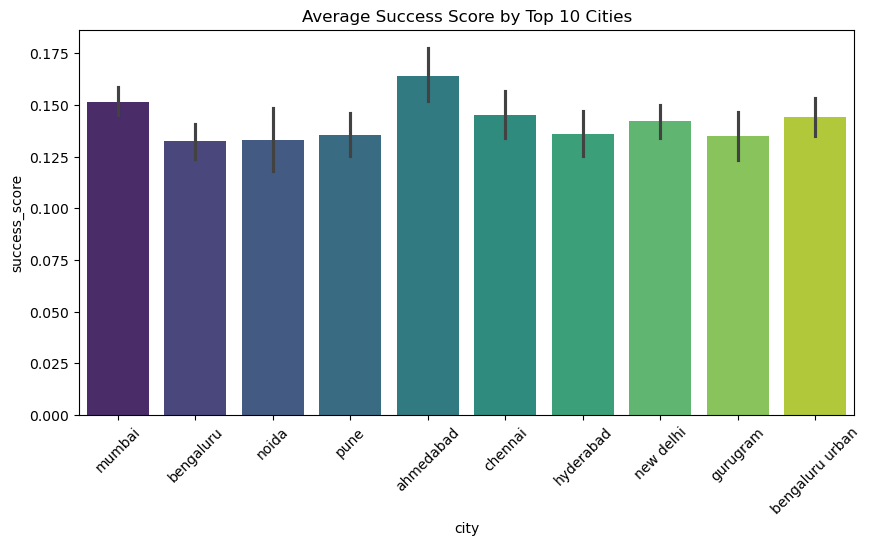

In [243]:
top_cities = data['city'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.barplot(x='city', y='success_score', data=data[data['city'].isin(top_cities)], palette='viridis')
plt.xticks(rotation=45)
plt.title("Average Success Score by Top 10 Cities")
plt.show()


In [244]:
result = {'Models:' : [],
          'MSE:' : [],
          'R2' : []
        }
result_dt = pd.DataFrame(result)
result_dt

,Models:,MSE:,R2


In [245]:
data.columns

Index(['company_name', 'year', 'city', 'state', 'sector', 'stage', 'funding',
       'funding_round', 'success_score', 'success_label', 'funding_log',
       'employee_log', 'investors_log', 'city_encoded', 'state_encoded'],
      dtype='object')

In [172]:
x = data.drop(['success_score','success_label','company_name','year','funding','city', 'state','investors_log','employee_log'], axis = 1)
y = data['success_score'] 

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [174]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

pred1 = lr.predict(x_test)

In [175]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, pred1))
print('R = Squared Value: ', r2_score(y_test, pred1) )

Mean_Squared_Error: 0.0008868891000960233
R = Squared Value:  0.86711048883948


In [176]:
result_dt.loc[len(result_dt)] = ["Linear Regression", mean_squared_error(y_test, pred1), r2_score(y_test, pred1)]

In [177]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

pred2 = lr.predict(x_test_poly)

In [178]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred2))
print('R = Squared Value: ', r2_score(y_test, pred2) )
result_dt.loc[len(result_dt)] = ["Polynomial Regression", mean_squared_error(y_test, pred2), r2_score(y_test, pred2)]

Mean_Squared_Error: 0.0007371292911391996
R = Squared Value:  0.8895501690673806


In [179]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

pred3 = rf_model.predict(x_test)

In [180]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred3))
print('R = Squared Value: ', r2_score(y_test, pred3) )
result_dt.loc[len(result_dt)] = ["Random Forest Regressor", mean_squared_error(y_test, pred3), r2_score(y_test, pred3)]

Mean_Squared_Error: 8.468449720349733e-05
R = Squared Value:  0.9873110612871117


In [181]:
result_dt

,Models:,MSE:,R2
0,Linear Regression,0.000887,0.867110
1,Polynomial Regression,0.000737,0.889550
2,Random Forest Regressor,0.000085,0.987311


In [182]:
result = {'Models:' : [], 'Accuracy:' : [], 'Precision' : [], 'Recall:' : [], 'F1-Score:' : [], 'Cross-Validation Scores:' : [] } 
result_dt = pd.DataFrame(result) 
result_dt

,Models:,Accuracy:,Precision,Recall:,F1-Score:,Cross-Validation Scores:


In [183]:
x = data.drop(['success_label','company_name','year','funding','city', 'state','investors_log','employee_log','funding_round', 'stage','funding_log'], axis = 1)
y = data['success_label']

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [185]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [186]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

In [187]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.6293103448275862
Precision: 0.641527861022313
Recall: 0.6293103448275862
F1 Score: 0.6334001717668177


In [188]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(log_reg, x, y, cv = kfold_validator)
cv_mean = np.mean(cv_score)

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [189]:
result_dt.loc[len(result_dt)] = ['Logistic Regression',accuracy_score(y_test,y_pred), precision_score(y_test,y_pred,average='weighted'), recall_score(y_test,y_pred, average='weighted'),
f1_score(y_test,y_pred,average='weighted'), cv_mean]

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train, y_train)

In [192]:
y_pred_dt = dt_cls.predict(x_test)

In [193]:
print('Accuracy is:', accuracy_score(y_test,y_pred_dt))
print('Precision is:', precision_score(y_test,y_pred_dt, average='weighted'))
print('Recall is:', recall_score(y_test,y_pred_dt, average='weighted'))
print('F1_score is:', f1_score(y_test,y_pred_dt, average='weighted'))

Accuracy is: 0.9971264367816092
Precision is: 0.9971322069888751
Recall is: 0.9971264367816092
F1_score is: 0.997127945101082


In [194]:
cv_score2 = cross_val_score(dt_cls, x, y, cv = kfold_validator)
cv_mean2 = np.mean(cv_score2)
cv_score2

array([1.        , 1.        , 1.        , 0.4137931 , 1.        ,
       1.        , 0.56321839, 1.        , 1.        , 1.        ])

In [195]:
result_dt.loc[len(result_dt)] =  ['Decision Tree Classifier',accuracy_score(y_test,y_pred_dt), precision_score(y_test,y_pred_dt, average='weighted'), recall_score(y_test,y_pred_dt, average='weighted'),
f1_score(y_test,y_pred_dt, average='weighted'), cv_mean2]

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train, y_train)

In [198]:
y_pred_rf = rf_cls.predict(x_test)

In [199]:
print('Accuracy is:', accuracy_score(y_test,y_pred_rf))
print('Precision is:', precision_score(y_test,y_pred_rf, average='weighted'))
print('Recall is:', recall_score(y_test,y_pred_rf, average='weighted'))
print('F1_score is:', f1_score(y_test,y_pred_rf, average='weighted'))

Accuracy is: 0.9980842911877394
Precision is: 0.9980957969463717
Recall is: 0.9980842911877394
F1_score is: 0.9980858303928819


In [200]:
cv_score3 = cross_val_score(rf_cls, x, y, cv = kfold_validator)
cv_mean3 = np.mean(cv_score3)
cv_score3

array([1.        , 1.        , 0.99233716, 0.4137931 , 1.        ,
       1.        , 0.56321839, 1.        , 1.        , 1.        ])

In [201]:
result_dt.loc[len(result_dt)] =  ['Random Forest Classifier',accuracy_score(y_test,y_pred_rf), precision_score(y_test,y_pred_rf, average='weighted'), recall_score(y_test,y_pred_rf, average='weighted'),
f1_score(y_test,y_pred_rf, average='weighted'),cv_mean3]

In [202]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(x_train, y_train_encoded)
y_pred_xg = xgb_model.predict(x_test)
y_pred_labels = le.inverse_transform(y_pred_xg)  # Optional: convert back to 'High', 'Medium', 'Low'

C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [203]:
print('Accuracy:', accuracy_score(y_test_encoded, y_pred_xg))
print('Precision:', precision_score(y_test_encoded, y_pred_xg, average='weighted'))
print('Recall:', recall_score(y_test_encoded, y_pred_xg, average='weighted'))
print('F1 Score:', f1_score(y_test_encoded, y_pred_xg, average='weighted'))

Accuracy: 0.9971264367816092
Precision: 0.9971322069888751
Recall: 0.9971264367816092
F1 Score: 0.997127945101082


In [204]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score4 = cross_val_score(xgb_model, x, y_encoded, cv=skf, scoring='accuracy')
cv_mean4 = np.mean(cv_score4)

C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

In [205]:
result_dt.loc[len(result_dt)] =  ['XGB Classifier',accuracy_score(y_test_encoded,y_pred_xg), precision_score(y_test_encoded,y_pred_xg, average='weighted'), recall_score(y_test_encoded,y_pred_xg, average='weighted'),
f1_score(y_test_encoded,y_pred_xg, average='weighted'),cv_mean4]

In [206]:

result_dt

,Models:,Accuracy:,Precision,Recall:,F1-Score:,Cross-Validation Scores:
0,Logistic Regression,0.629310,0.641528,0.629310,0.633400,0.303808
1,Decision Tree Classifier,0.997126,0.997132,0.997126,0.997128,0.897701
2,Random Forest Classifier,0.998084,0.998096,0.998084,0.998086,0.896935
3,XGB Classifier,0.997126,0.997132,0.997126,0.997128,0.998084


In [207]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y, cv=cv, scoring='f1_macro')
print("F1 Scores across folds:", scores)
print("Mean F1 Score:", scores.mean())

F1 Scores across folds: [0.99905156 0.99810306 0.99905161 0.99809324 0.99714476]
Mean F1 Score: 0.998288846235632


In [208]:
from sklearn.metrics import balanced_accuracy_score

bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {bal_acc:.4f}")

Balanced Accuracy: 0.6270


              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1703
         Low       1.00      1.00      1.00      1742
      Medium       1.00      1.00      1.00      1774

    accuracy                           1.00      5219
   macro avg       1.00      1.00      1.00      5219
weighted avg       1.00      1.00      1.00      5219



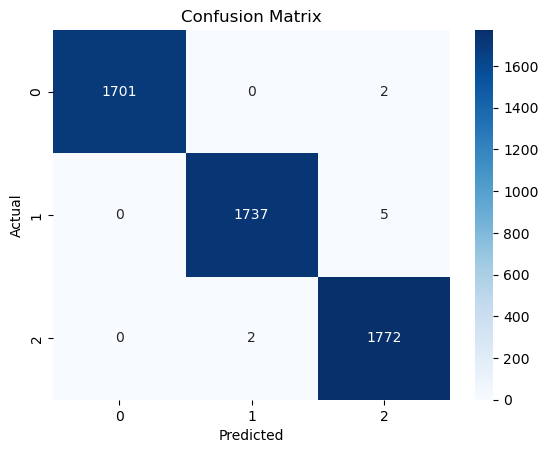

In [209]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(pipeline, x, y, cv=cv)
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define features and target
X = data.drop(columns=['company_name','city', 'state', 'success_score', 'funding_log', 'success_label'])
Y = data['funding_log']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Predict
Y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(Y_test, Y_pred))

MAE: 0.0038622562156744866


In [212]:
from sklearn.ensemble import RandomForestRegressor

X = data[['funding', 'employee_log','sector', 'city_encoded', 'state_encoded']]
y = data['success_score']

model2 = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42)
model2.fit(X, y)

RandomForestRegressor(max_depth=12, n_estimators=300, random_state=42)

In [213]:
def simulate_growth(profile, year):
    years_since_start = year - 2025
    return {
        'funding': profile['funding'] * (1.2 ** years_since_start),  # 20% annual growth
        'employee_log': np.log1p(profile['employee_count'] * (1.15 ** years_since_start)),  # 15% team growth
        'sector': profile['sector'],
        'city_encoded': profile['city_encoded'],
        'state_encoded': profile['state_encoded']
    }

In [214]:
def simulate_success_year_only(profile, model, high_thresh=0.210):
    for year in range(2025, 2036):
        features = simulate_growth(profile, year)
        X_input = pd.DataFrame([features], columns=[
            'funding', 'employee_log', 'sector', 'city_encoded', 'state_encoded'
        ])
        score = model2.predict(X_input)[0]
        if score >= high_thresh:
            return year
    return None

In [215]:
profile = {
    'funding': 10000000,         # ₹1 crore
    'employee_count': 50,# Strong team
    'sector': 2,
    'city_encoded': 1,
    'state_encoded': 0
}
year = simulate_success_year_only(profile, model)
print("Predicted success year:", year)

Predicted success year: 2028


In [216]:
predicted_year = simulate_success_year_only(profile, model2)

if predicted_year:
    print(f"✅ Startup is predicted to reach high success in {predicted_year}")
else:
    print("⚠️ Startup is unlikely to reach high success by 2035")

✅ Startup is predicted to reach high success in 2028


In [217]:
import pickle
with open("success_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

In [218]:
import pickle
with open("funding_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [219]:
import pickle
with open("year_model.pkl", "wb") as f:
    pickle.dump(model2, f)